In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [4]:
filename_A, filename_D = 'G10A.csv', 'G10D.csv'

In [5]:
def replace_comma_per_dot(filename):
    with open(filename, 'r') as file:
        conteudo = file.read()
    conteudo = conteudo.replace(',','.')
    with open(filename, 'w') as file:
        file.write(conteudo)

In [6]:
replace_comma_per_dot(filename_A)
replace_comma_per_dot(filename_D)

In [7]:
data_A, data_D = pd.read_csv(filename_A, delimiter=';'), pd.read_csv(filename_D, delimiter=';')

In [8]:
data_D

,Position (mm),Force (N),Strain (%),Time (min)
0,0.00000,0.00,-0.000167,0.00368
1,0.00204,1.73,0.001180,0.00681
2,0.00600,3.72,0.002500,0.00994
3,0.00900,5.00,0.003370,0.01310
4,0.01200,5.00,0.004270,0.01620
...,...,...,...,...
996,3.28000,1250.00,0.800000,3.12000
997,3.28000,1260.00,0.800000,3.12000
998,3.29000,1260.00,0.800000,3.12000
999,3.30000,1270.00,0.800000,3.13000


In [9]:
data_A

,Position (mm),Force (N),Strain (%),Time (min),largura (mm),espessura (mm)
0,0.00000,-1.67,-0.002000,0.00285,12.7,3.15
1,0.00000,0.00,-0.002000,0.00380,NaN,NaN
2,0.00576,0.00,-0.001590,0.00475,NaN,NaN
3,0.00922,0.00,-0.001000,0.00570,NaN,NaN
4,0.01370,0.00,-0.000223,0.00664,NaN,NaN
...,...,...,...,...,...,...
995,15.60000,1210.00,0.801000,1.09000,NaN,NaN
996,15.70000,1190.00,0.801000,1.09000,NaN,NaN
997,15.70000,1170.00,0.801000,1.09000,NaN,NaN
998,15.80000,1150.00,0.801000,1.10000,NaN,NaN


## Análise da amostra A

In [10]:
largura = data_A['largura (mm)'][0]
espessura  = data_A['espessura (mm)'][0]
area = largura * espessura

In [11]:
# Eixo y
lista_tensao_A = data_A['Force (N)'] / area # MPa ; Tensao

# Eixo x
lista_strain_A = data_A['Strain (%)']

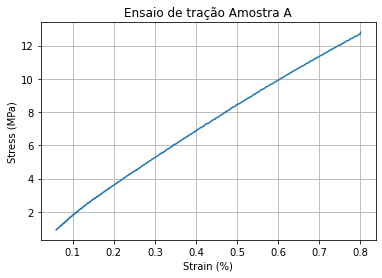

In [12]:
plt.plot(lista_strain_A[200:len(lista_strain_A) - 350], lista_tensao_A[200:len(lista_strain_A) - 350], label='Amostra A')
plt.title("Ensaio de tração Amostra A")
plt.grid(True)
plt.xlabel('Strain (%)')
plt.ylabel('Stress (MPa)')
plt.show()

## Análise da amostra D

In [13]:
# Eixo y
lista_tensao_D = data_D['Force (N)'] / area # MPa ; Tensao

# Eixo x
lista_strain_D = data_D['Strain (%)']

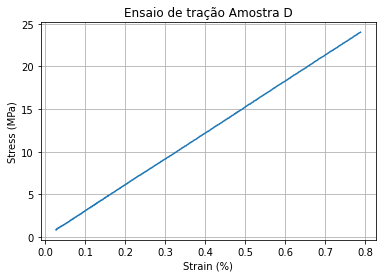

In [14]:
plt.plot(lista_strain_D[200:len(lista_strain_D) - 100], lista_tensao_D[200:len(lista_strain_D) - 100], label='Amostra D')
plt.title("Ensaio de tração Amostra D")
plt.grid(True)
plt.xlabel('Strain (%)')
plt.ylabel('Stress (MPa)')
plt.show()

## Linear Regression (sklearn)

### Regressão linear da amostra D

In [15]:
X, y = np.array(lista_strain_D[200:len(lista_strain_D) - 100]).reshape(-1, 1), np.array(lista_tensao_D[200:len(lista_strain_D) - 100]).reshape(-1, 1)


In [16]:
reg = LinearRegression().fit(X, y)

In [17]:
reg.score(X, y)

0.9999899937634669

In [18]:
reg.coef_, reg.intercept_

(array([[30.3968161]]), array([0.0522967]))

In [19]:
def plot_regression(reg, amostra, x0=0, y0=0.8):
    x0, y0 = -0.1, reg.predict([[-0.1]])[0][0]
    x1, y1 = 0.9, reg.predict([[0.9]])[0][0]
    a, b = reg.coef_[0][0], reg.intercept_[0]
    plt.plot([x0, x1], [y0, y1], 'r--', label=f'Fit linear: {a:.3f}x + ({b:.3f}) \n$E_{amostra}$ = {a / 10:.2f} GPa')

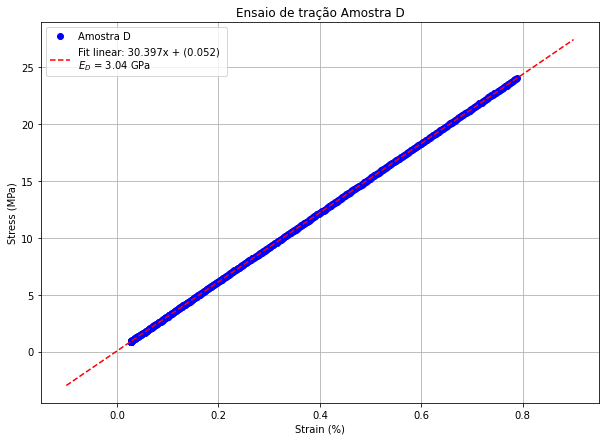

In [20]:
plt.figure(figsize=(10,7))
plt.plot(lista_strain_D[200:len(lista_strain_D) - 100], lista_tensao_D[200:len(lista_strain_D) - 100], 'bo', label='Amostra D')
plot_regression(reg,'D')
plt.title("Ensaio de tração Amostra D")
plt.grid(True)
plt.xlabel('Strain (%)')
plt.ylabel('Stress (MPa)')
plt.legend()
plt.show()

Portanto, temos que o módulo de elasticidade de D é: 

$$E = \tan (\alpha) = \frac{\Delta \sigma}{\Delta \epsilon}  $$

In [21]:
E_D = reg.coef_
E_D[0][0]
print(f'Dessa forma, o módulo de elasticidade de D é: E = {E_D[0][0] / 10:.2f} GPa')

Dessa forma, o módulo de elasticidade de D é: E = 3.04 GPa


### Regressão linear da amostra A

In [22]:
X, y = np.array(lista_strain_A[200:len(lista_strain_A) - 350]).reshape(-1, 1), np.array(lista_tensao_A[200:len(lista_strain_A) - 350]).reshape(-1, 1)
X, y

(array([[0.0594],
        [0.0605],
        [0.0616],
        [0.0625],
        [0.0636],
        [0.0645],
        [0.0654],
        [0.0665],
        [0.0674],
        [0.0682],
        [0.0689],
        [0.0697],
        [0.0704],
        [0.0712],
        [0.0718],
        [0.0724],
        [0.0733],
        [0.0739],
        [0.0746],
        [0.0753],
        [0.0759],
        [0.0766],
        [0.0774],
        [0.0781],
        [0.0788],
        [0.0795],
        [0.0801],
        [0.0808],
        [0.0815],
        [0.0822],
        [0.0831],
        [0.0837],
        [0.0846],
        [0.0853],
        [0.086 ],
        [0.0867],
        [0.0874],
        [0.0882],
        [0.089 ],
        [0.0897],
        [0.0905],
        [0.0911],
        [0.0919],
        [0.0927],
        [0.0935],
        [0.0943],
        [0.0951],
        [0.0958],
        [0.0965],
        [0.0973],
        [0.098 ],
        [0.0989],
        [0.0996],
        [0.1   ],
        [0.101 ],
        [0

In [23]:
reg = LinearRegression().fit(X, y)

In [24]:
reg.score(X, y)

0.9979816576569673

In [25]:
reg.coef_, reg.intercept_

(array([[15.85771389]]), array([0.36778871]))

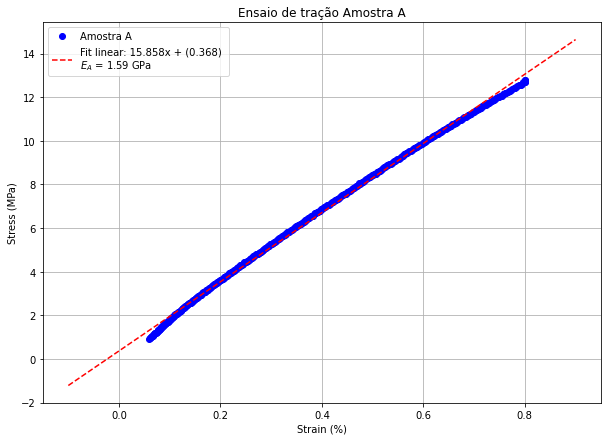

In [26]:
plt.figure(figsize=(10,7))
plt.plot(lista_strain_A[200:len(lista_strain_A) - 350], lista_tensao_A[200:len(lista_strain_A) - 350], 'bo', label='Amostra A')
plot_regression(reg, 'A')
plt.title("Ensaio de tração Amostra A")
plt.grid(True)
plt.xlabel('Strain (%)')
plt.ylabel('Stress (MPa)')
plt.legend()
plt.show()

In [27]:
E_A = reg.coef_
E_A[0][0]
print(f'Dessa forma, o módulo de elasticidade de A é: E = {E_A[0][0] / 10:.2f} GPa')

Dessa forma, o módulo de elasticidade de A é: E = 1.59 GPa


## Análise de limite de escoamento de A

In [28]:
# Eixo y: lista_tensao_A

# Eixo x:
lista_strain_total_A = (data_A['Position (mm)'] / 50) * 100

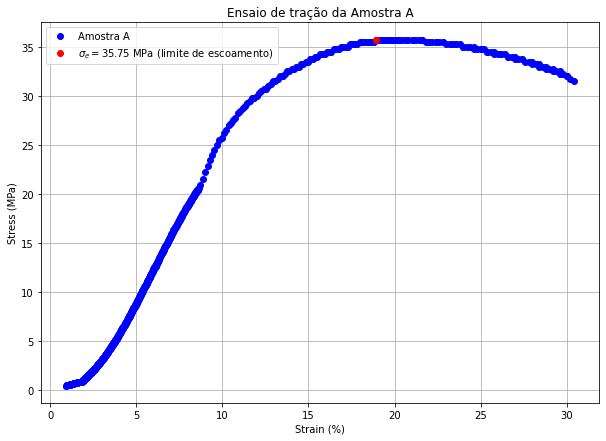

Portanto, temos que o limite de escoamento para a amostra A é: 35.75 MPa


In [29]:
plt.figure(figsize=(10,7))
plt.plot(lista_strain_total_A[100:len(lista_strain_total_A) -10], lista_tensao_A[100:len(lista_strain_total_A) -10], 'bo', label='Amostra A')
plt.plot(lista_strain_total_A[list(lista_tensao_A).index(max(lista_tensao_A))], max(lista_tensao_A), 'ro', label=f'$\sigma_e = {max(lista_tensao_A):.2f}$ MPa (limite de escoamento)')
plt.ylabel('Stress (MPa)')
plt.xlabel('Strain (%)')
plt.title('Ensaio de tração da Amostra A')
plt.legend()
plt.grid(True)
plt.show()
print(f'Portanto, temos que o limite de escoamento para a amostra A é: {max(lista_tensao_A):.2f} MPa')

## Análise de limite de escoamento de D

In [30]:
# Eixo y: lista_tensao_D

# Eixo x:
lista_strain_total_D = (data_D['Position (mm)'] / 50) * 100

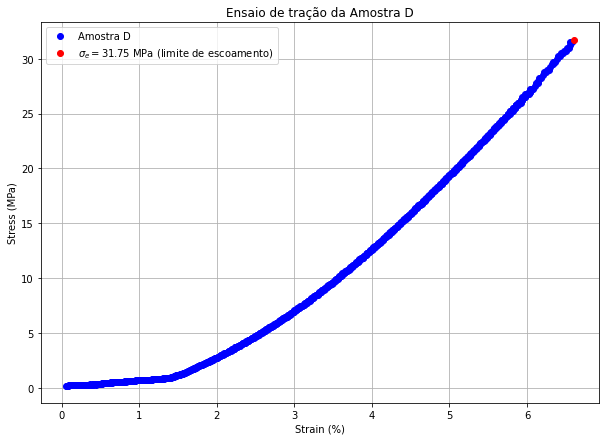

Portanto, temos que o limite de escoamento para a amostra D é: 31.75 MPa


In [37]:
plt.figure(figsize=(10,7))
plt.plot(lista_strain_total_D[10:len(lista_strain_total_D) -2], lista_tensao_D[10:len(lista_strain_total_D) -2], 'bo', label='Amostra D')
plt.plot(lista_strain_total_D[list(lista_tensao_D).index(max(lista_tensao_D))], max(lista_tensao_D), 'ro', label=f'$\sigma_e = {max(lista_tensao_D):.2f}$ MPa (limite de escoamento)')
plt.ylabel('Stress (MPa)')
plt.xlabel('Strain (%)')
plt.title('Ensaio de tração da Amostra D')
plt.legend()
plt.grid(True)
plt.show()
print(f'Portanto, temos que o limite de escoamento para a amostra D é: {max(lista_tensao_D):.2f} MPa')